In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_plot(file_path, title="SDXL, Batch Size: 1, Steps: 30"):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Drop the columns that are not needed
    columns_to_drop = [
        'batch_size', 'num_inference_steps',
        'pipeline_cls', 'ckpt_id', 'upcast_vae', 'memory (gbs)',
        'actual_gpu_memory (gbs)',
        'tag'
    ]
    df_filtered = df.drop(columns=columns_to_drop)
    df_filtered[["quant"]] = df_filtered[["do_quant"]].fillna("None")
    df_filtered.drop(columns=["do_quant"], inplace=True)

    # Create a new column to consolidate settings into a readable format
    df_filtered['settings'] = df_filtered.apply(lambda row: ', '.join([f"{col}-{row[col]}" for col in df_filtered.columns if col != 'time (secs)']), axis=1)
    df_filtered['formatted_settings'] = df_filtered['settings'].str.replace(", ", "\n", regex=False)
    df_filtered.loc[0, 'formatted_settings'] = "default"

    # Generating the plot with matplotlib directly for better control
    plt.figure(figsize=(12, 10))
    sns.set_style("whitegrid")

    # Calculate the number of unique settings for bar positions
    n_settings = len(df_filtered['formatted_settings'].unique())
    bar_positions = range(n_settings)

    # Choose a color palette
    palette = sns.color_palette("husl", n_settings)

    # Plot each bar manually
    bar_width = 0.25  # Width of the bars
    for i, setting in enumerate(df_filtered['formatted_settings'].unique()):
        # Filter the dataframe for each setting and get the mean time
        mean_time = df_filtered[df_filtered['formatted_settings'] == setting]['time (secs)'].mean()
        plt.bar(i, mean_time, width=bar_width, align='center', color=palette[i])

        # Add the text above the bars
        plt.text(i, mean_time + 0.01, f'{mean_time:.2f}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Set the x-ticks to correspond to the settings
    plt.xticks(bar_positions, df_filtered['formatted_settings'].unique(), rotation=45, ha='right', fontsize=10)

    plt.ylabel('Time in Seconds', fontsize=14, labelpad=15)
    plt.xlabel('Settings', fontsize=14, labelpad=15)
    plt.title(title, fontsize=18, fontweight="bold", pad=20)

    # Adding horizontal gridlines for better readability
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.2)  # Adjust the top and bottom

    plt.savefig(title.replace(" ", "_") + ".png", bbox_inches="tight", dpi=300)

    # Show the plot
    plt.show()

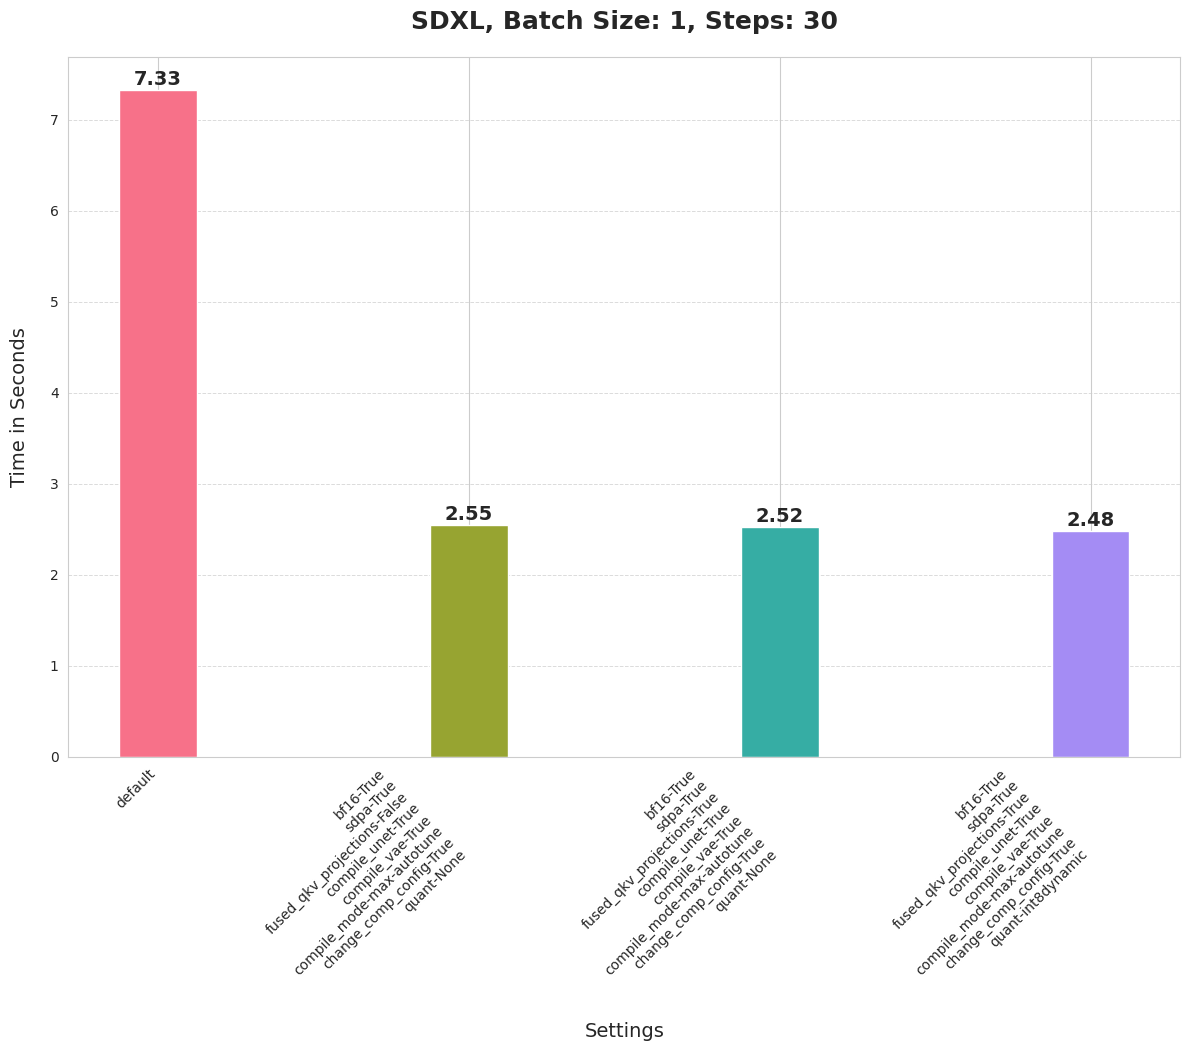

In [2]:
get_plot("https://huggingface.co/datasets/sayakpaul/sample-datasets/raw/main/sdxl_results/collated_results_peft.csv")

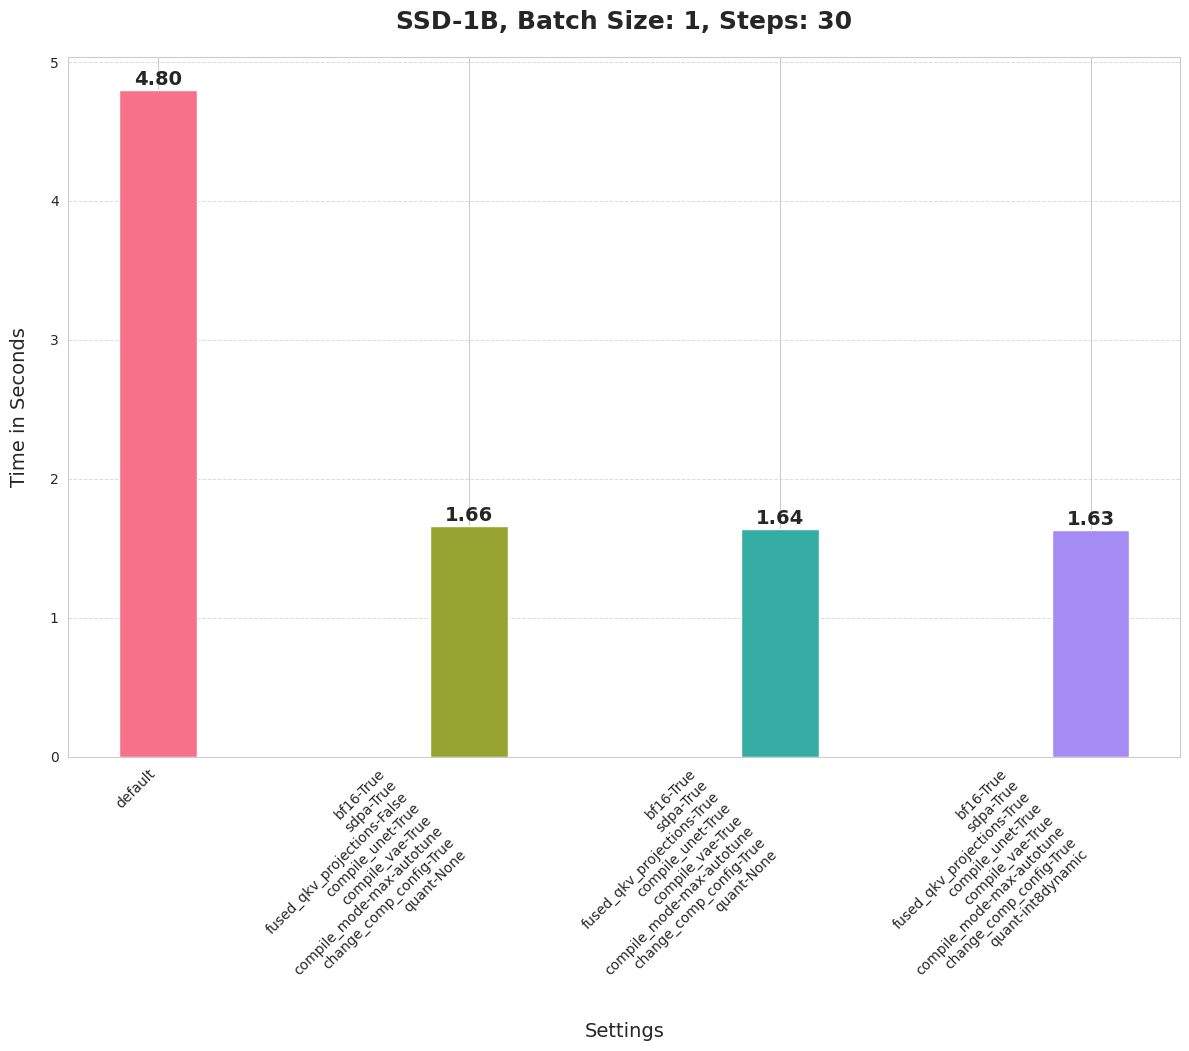

In [3]:
get_plot("https://huggingface.co/datasets/sayakpaul/sample-datasets/raw/main/ssd-1b/collated_results_peft.csv",
         "SSD-1B, Batch Size: 1, Steps: 30")

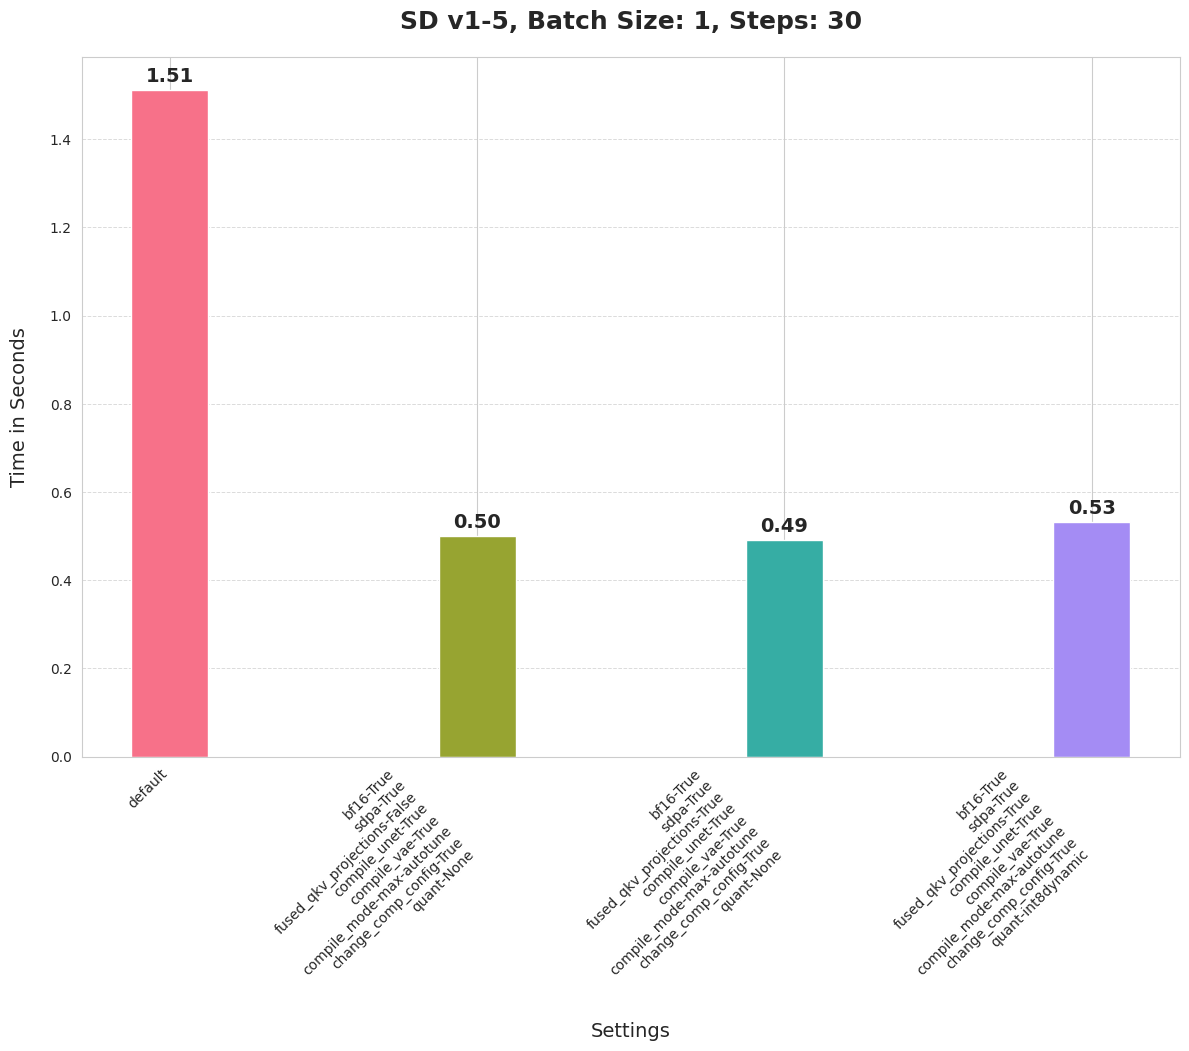

In [4]:
get_plot("https://huggingface.co/datasets/sayakpaul/sample-datasets/raw/main/sdv1-5/collated_results_peft.csv",
         "SD v1-5, Batch Size: 1, Steps: 30")

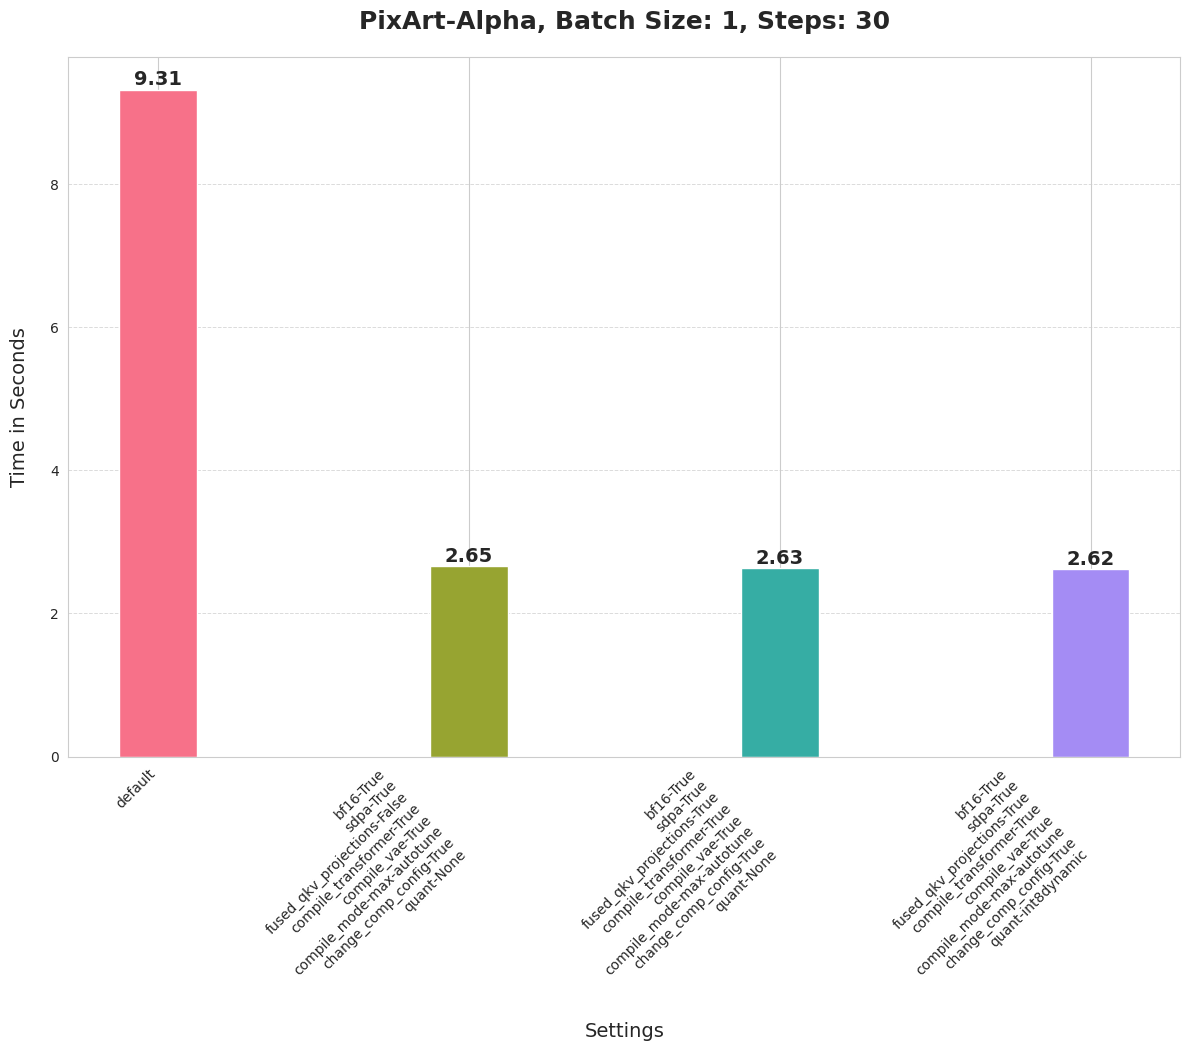

In [5]:
get_plot("https://huggingface.co/datasets/sayakpaul/sample-datasets/raw/main/pixart/collated_results_peft.csv",
         "PixArt-Alpha, Batch Size: 1, Steps: 30")